In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/2_Wildfire_Analysis/3_Statistics/Input')
#Output = (''/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/2_Wildfire_Analysis/3_Statistics/Output')
cur_date = '010821'

library(readxl)
library(tidyverse)
library(reshape2)

#reading in file
#VSD_df <- data.frame(read_excel("010121_PeatSmolder_24h_Heat_VSD.xlsx"))
VSD_df = data.frame(read_excel('010621_PeatSmolder_24h_Heart_VSD_Hif1a.xlsx', sheet = 2))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
head(VSD_df)

,Gene,M77_PeatSmolder,M78_PeatSmolder,M79_PeatSmolder,M80_PeatSmolder,M81_PeatSmolder,M82_PeatSmolder,MH101_Saline,MH102_Saline,MH103_Saline,MH104_Saline,MH105_Saline,MH106_Saline
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Akt1,10.725038,11.048619,11.262783,10.956482,10.646215,10.682600,11.955144,12.332187,12.033441,12.053117,11.958400,11.950311
2,Akt1,9.349577,9.585530,10.019945,9.733898,9.592442,9.530554,9.533674,10.588191,10.219088,9.698560,10.122790,9.705852
3,Akt1,8.903329,9.351273,9.486650,9.199964,9.247027,9.383029,10.391407,10.753081,10.525747,10.378570,10.554185,10.274184
4,Camk1,8.602527,9.093690,9.309200,8.976457,9.073243,9.297672,11.456412,11.418455,11.070222,11.271588,10.705830,10.924141
5,Camk1,10.265955,9.612264,9.587021,9.914696,9.796619,9.646018,10.268802,10.033132,9.828338,9.973876,9.443886,9.736891
6,Cybb,7.567197,7.605530,7.361296,7.785104,8.384887,8.382512,7.480598,7.185955,7.084743,6.816250,6.889347,7.246625


Visualizing data's distribution of each gene comparing VSD counts (with SVA) in unexposed (Saline) vs. exposed (Peat Smolder) samples by plotting box plots.

In [3]:
#changing column names to Saline or Peat Smolder
colnames(VSD_df)[2:6] = c('Saline')
colnames(VSD_df)[7:13] = c('Peat Smolder')
colnames(VSD_df)

[1] "Gene"         "Saline"       "Saline"       "Saline"       "Saline"      
 [6] "Saline"       "Peat Smolder" "Peat Smolder" "Peat Smolder" "Peat Smolder"
[11] "Peat Smolder" "Peat Smolder" "Peat Smolder"

In [4]:
#need to melt df to allow for easier visualization with ggplot
melted_VSD_df = melt(VSD_df, variable = 'Treatment', value.name = 'VSD')
head(melted_VSD_df)

Using Gene as id variables



,Gene,Treatment,VSD
,<chr>,<fct>,<dbl>
1,Akt1,Saline,10.725038
2,Akt1,Saline,9.349577
3,Akt1,Saline,8.903329
4,Camk1,Saline,8.602527
5,Camk1,Saline,10.265955
6,Cybb,Saline,7.567197


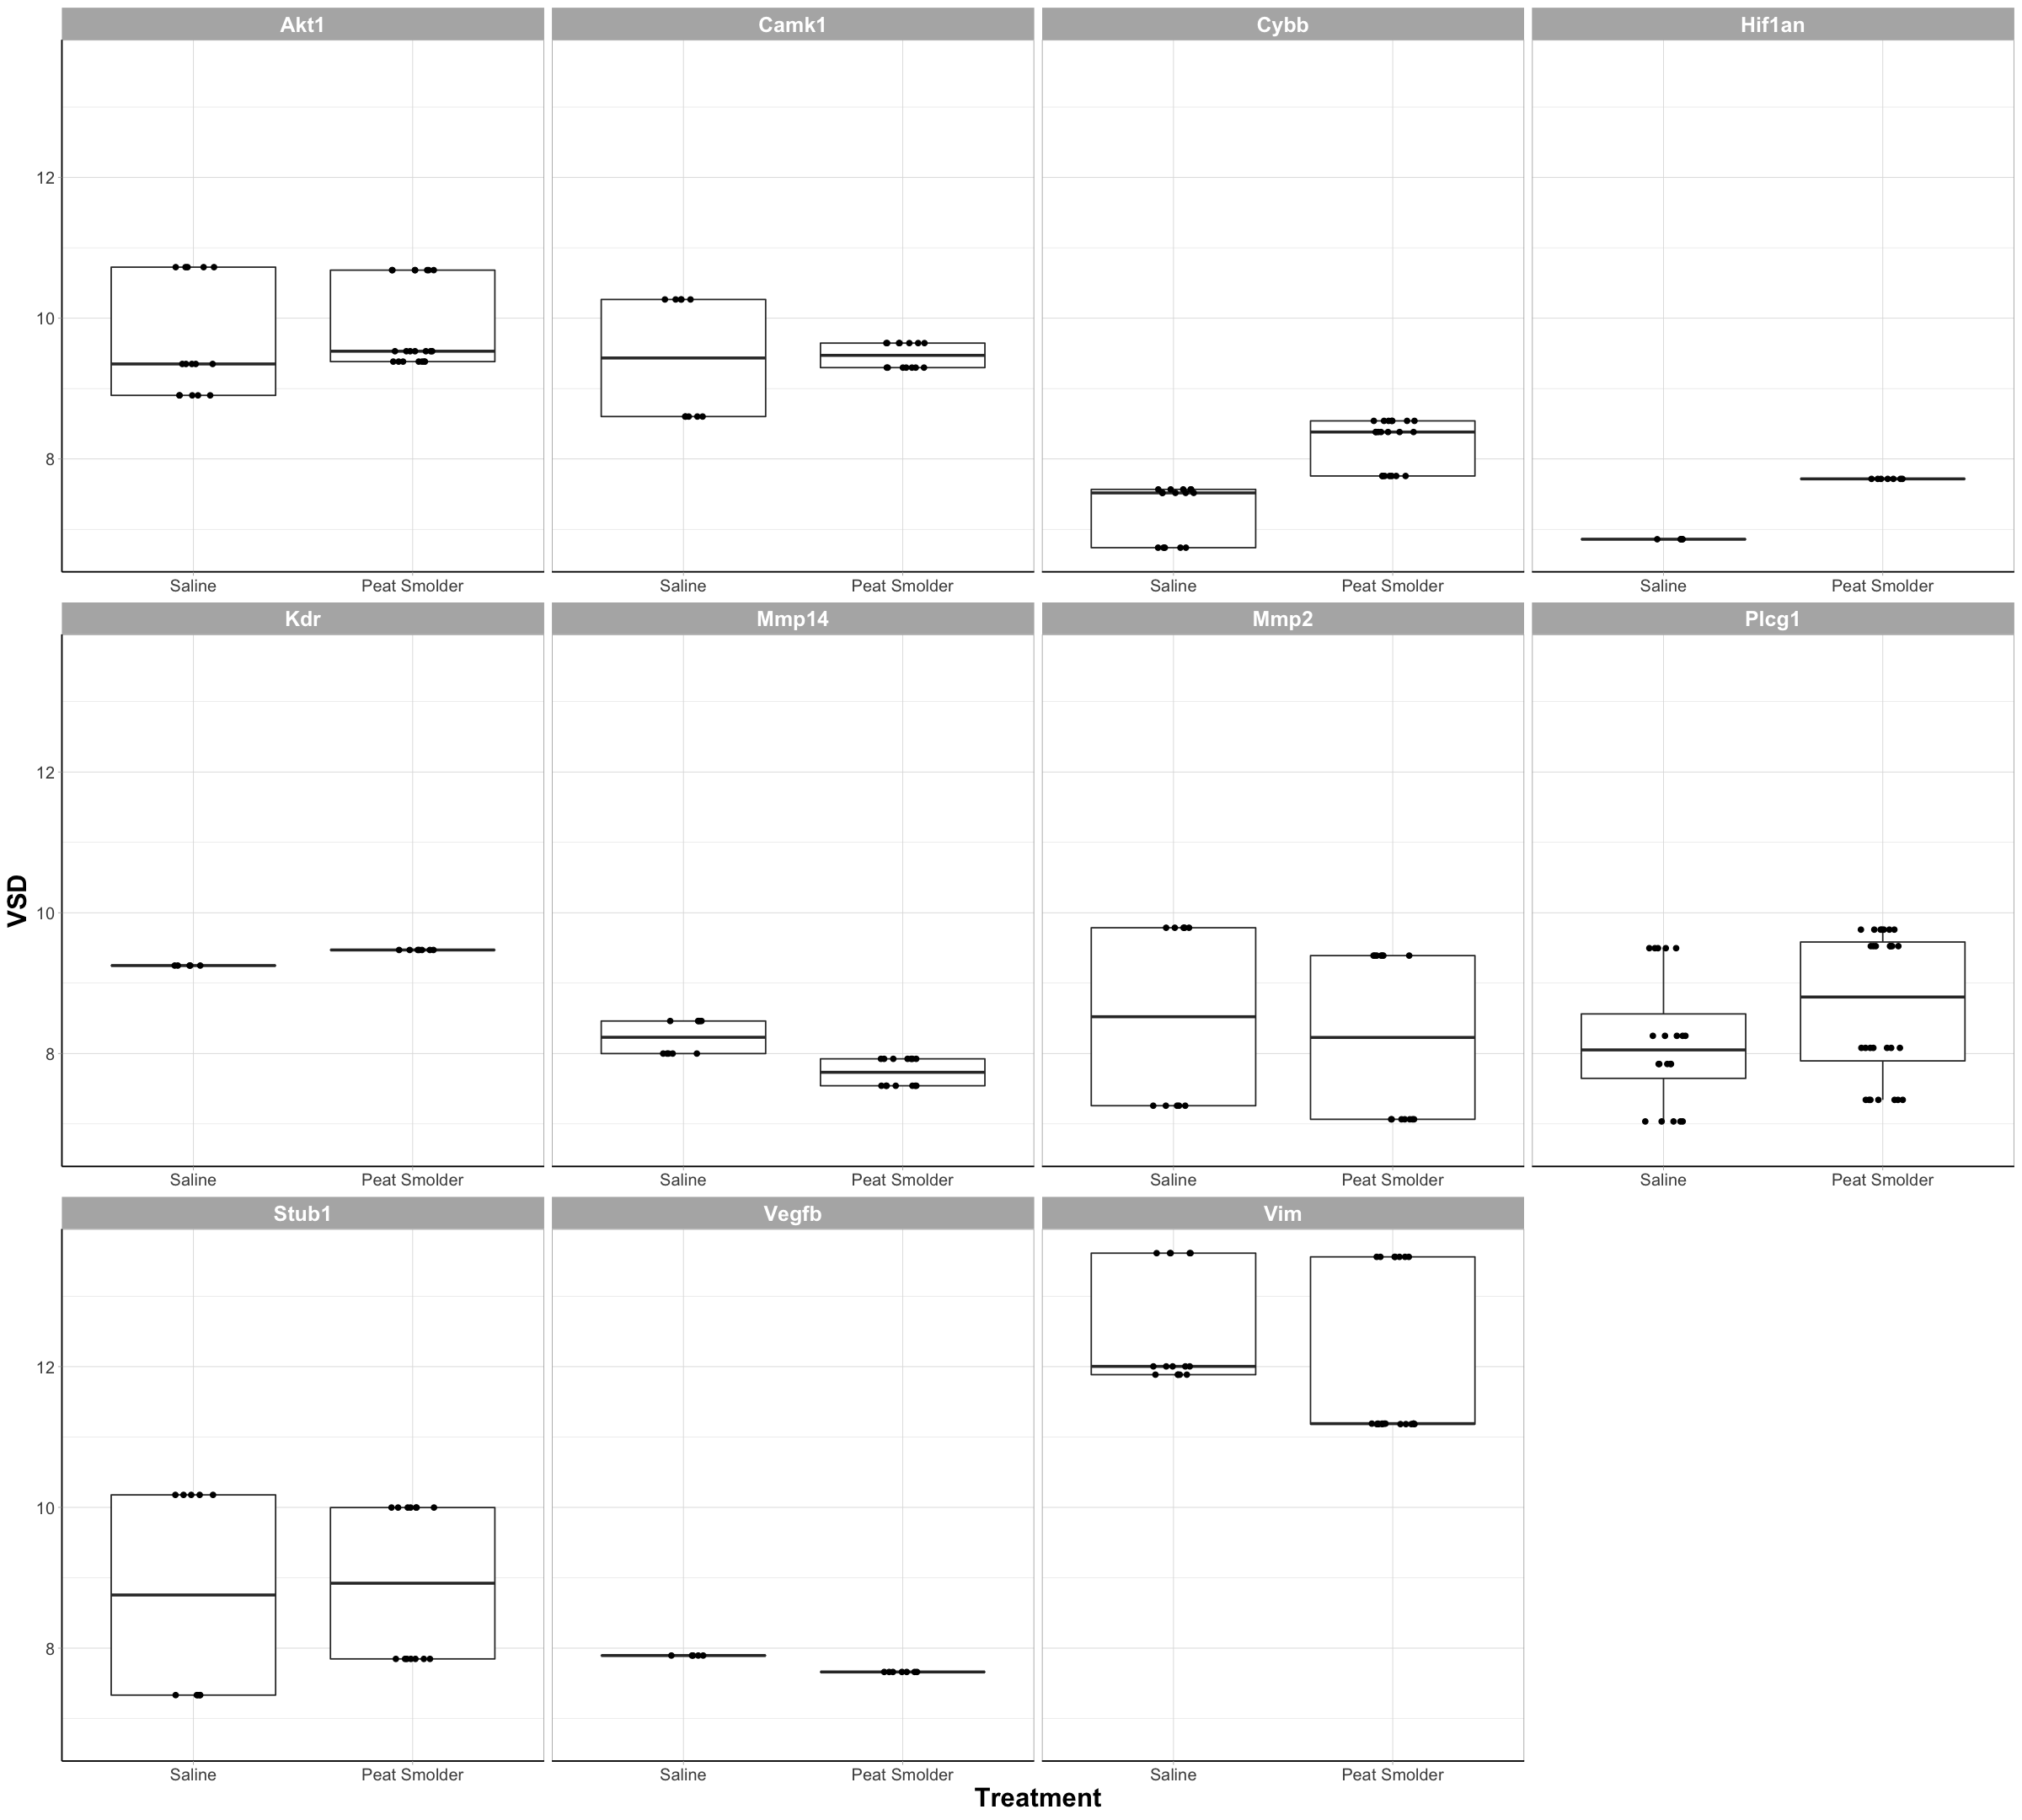

In [6]:
options(repr.plot.width= 20, repr.plot.height= 18) #changing size
ggplot(data = melted_VSD_df, aes(x = Treatment, y = VSD)) + 
  geom_boxplot() + 
  geom_point(position = position_jitter(h = 0, w = 0.1)) +
  facet_wrap(~Gene, scales = 'free_x') +

  theme_light() + 

  theme(legend.position = "none", #removing legend
        axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold"))  #changes size of facet y axis 